In [39]:
import numpy as np
import pandas as pd
import os
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal

## 7.1 LDA & QDA
- Generative Model
    - **LDA (Linear Discriminant Analysis)**
    - **QDA (Quadratic Discriminant Analysis)**
- Generative Model
     - In a Generative model, the Bayesian's law is used to find the $p(y = k \mid x)$
$$
P(y = k \mid x) = \dfrac{P(x \mid y = k)\; P(y = k)}{P(x)}
$$
    - To solve a classification problem, we need to compare each classes of probability and pick a class that has a highest probability. 
    - Therefore, we do not need to find the ${P(x)}$. Because it is the denominator for every classes.Because of this reason, we can simplify the above equation as below,
$$
P(y = k \mid x) \;\; \propto \;\; P(x \mid y = k) \; P(y = k)
$$
    - If there is no specific information, then a prior probability $p(y = k)$ can be calculated as below, 
$$
P(y = k) \approx \frac{\;\;\;\; \text{ number of data when } y = k \text{ }\;\;\;\;\;\; }{{\text{ }}\text{ number of total data}\;\;\;\;\;\;\;\;}
$$
    - Let's try to find the $P(x \mid y = k)$
        - 1. We assume that the $P(x \mid y = k)$ follows a probability disribution. In the other words, we assume a probability of density function (pdf).
        - 2. By using the training data $\{x_1, \cdots, x_N\}$ of class k, we estimate the pdf's parameter.
        - 3. Since we already found the parameter, we found the pdf of $P(x \mid y = k)$. If new data comes in for x, we can calculate $P(x \mid y = k)$.

### - QDA (Quadratic Discriminant Analysis)
- In a QDA, we assume that the random varaibles are a real number, and multivariate normal distribution. 
- But, a location or shape of random variables could be changed based on the class.
$$
p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)
$$
- If we know the above euqation, we can solve the below equation by using the Bayesian's law and law of total probability.
$$
P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }
$$
- For example,
    - Let's say y has 3 classes as 1, 2, 3, and probability of distribution of x on each class has below expectation value ($\mu$) and Covariance Matrix ($\Sigma$),

- $$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$
- $$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$
    - prior probability of $y$ is same as below,

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

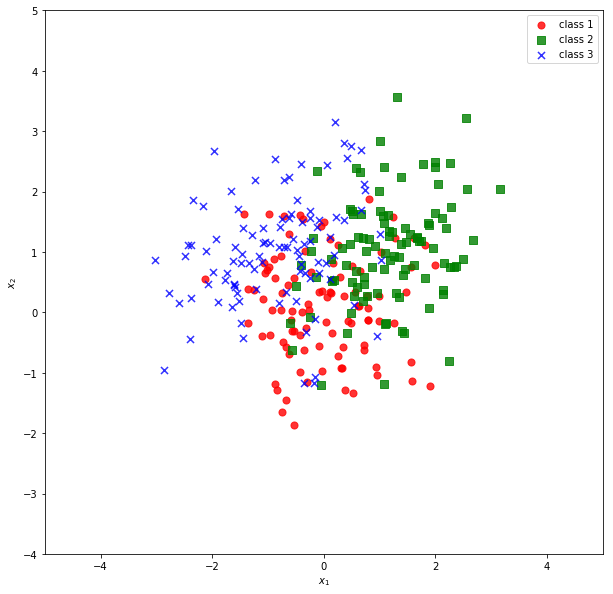

In [18]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])

np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)

y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)

X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.figure(figsize=(10,10))
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

#### - Scikit-Learn Provide "QuadraticDiscriminantAnalysis".
- Methods
    - 1) *priors_*: prior probability of each classes.
    - 2) *means_*: Estimated Expecation Vector of random variable values of each classes.
    - 3) *covariance_*: Estimated Covariance Matrix of random variable values of each classes.
        - This will be provided if "store_covarinace=True")

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [23]:
# estimated prior prob
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [24]:
# estimated expecation values
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [31]:
# estimated covariance matrix
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [32]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [33]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

#### - Result of QDA (Quadratic Discriminant Analysis)

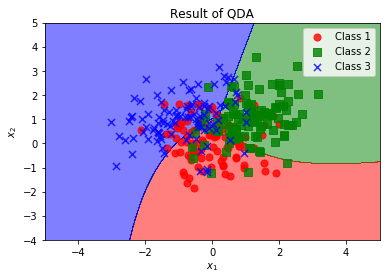

In [42]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="Class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="Class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="Class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Result of QDA")
plt.legend()
plt.show()